In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import scipy.sparse as sp
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)

# Load everything

In [2]:
print("Loading gene lists...")
#load the gene list
mofa_genes_df = pd.read_csv('../Expimap/expimap_10_factors_selected_norepeatinggenes/var_names.csv')
broad_markers = pd.read_csv('broad_markers.csv', index_col='Unnamed: 0')
broad_markers_list = list(set(broad_markers.values.flatten().astype(str)[broad_markers.values.flatten().astype(str) != 'nan']))
de_genes_df = pd.read_pickle('de_genes_to_be_added.csv')
mofa_genes = mofa_genes_df.values.flatten().tolist()
de_genes = de_genes_df.values.flatten().tolist()
xenium_df = pd.read_csv('pdac_xenium_panel.csv')
xenium_genes = list(set(xenium_df.Gene.tolist()))

print(f"Length of MOFA genes: {len(mofa_genes)}")
print(f"Length of broad marker genes: {len(broad_markers_list)}")
print(f"Length of DE genes: {len(de_genes)}")
print(f"Length of xenium panel genes: {len(xenium_genes)}")


all_genes = list(set(mofa_genes + broad_markers_list + de_genes + xenium_genes))
print(f"Total unique genes combined: {len(all_genes)}")

#load the anndata objects
adata_sc = sc.read_h5ad('../single_cell_int/adata_sc_int_cnv.h5ad')
adata_sn = sc.read_h5ad('../single_nuc_int/adata_nuc_int_outlier_genes.h5ad')

Loading gene lists...
Length of MOFA genes: 2134
Length of broad marker genes: 185
Length of DE genes: 81
Length of xenium panel genes: 480
Total unique genes combined: 2520


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
adata_sn

AnnData object with n_obs × n_vars = 251058 × 39024
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'treatment_status', 'celltype_infercnv', 'celltypes', 'cnv_leiden', 'cnv_score', 'new_celltypes', 'Level 1 Annotation', 'Level 2 Annotation', 'Level 3 Annotation', 'new_treatment', 'response', 'Condition', 'ID_Unique', 'Label_Harmonized', 'Dataset_Barcode_repeated', 'batch_covariate', 'scpoli_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'outlier'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ensembl_id', 'start', 'end', 'chromosome'
    uns: 'Dataset_colors', 'ID_colors', 'batch_covariate_colors', 'neighbors', 'response_colors', 'scpoli_labels_colors', 'treatment_status_colors', 'umap'
    obsm: 'X_

In [4]:
adata_sc

AnnData object with n_obs × n_vars = 617160 × 39024
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'batch', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'Condition', 'ID_Unique', 'Label_Harmonized', 'Dataset_Barcode', 'batch_covariate', 'leiden_0.2', 'leiden_0.2_annotation', 'Level_0', 'leiden_subcluster', 'level0_leiden_subcluster', 'Level_1', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs'
    var: 'gene_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'n_cells_by_counts', 'mean_counts', 'log1p_m

# Concatenate the anndata

In [10]:
adata = adata_sc.concatenate(adata_sn, join='outer')

/tmp/ipykernel_2225330/2504229703.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_sc.concatenate(adata_sn, join='outer')
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_mak

In [11]:
adata

AnnData object with n_obs × n_vars = 868218 × 39024
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'batch', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'Condition', 'ID_Unique', 'Label_Harmonized', 'Dataset_Barcode', 'batch_covariate', 'leiden_0.2', 'leiden_0.2_annotation', 'Level_0', 'leiden_subcluster', 'level0_leiden_subcluster', 'Level_1', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'celltype_infercnv', 'celltypes', 'cnv_leiden', 'cnv_score', 'new_celltypes', 'Level 1 Annotation', 'Level 2 Annotation', 'Level 3 Annotation', 'new_treatment', 'response', 'Datas

# Load the zarr and add the attributes to concatenated adata

In [ ]:
zarr_scpoli = ad.read_zarr('../Finalized/adata_scpoli_final.zarr/')

In [42]:
zarr_scpoli

AnnData object with n_obs × n_vars = 868218 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'ID', 'Condition', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'mito-0', 'n_cells_by_counts-1

In [39]:
zarr_scpoli.obsm['X_scpoli'].shape

(868218, 10)

In [44]:
adata.obsm['X_scpoli'] = zarr_scpoli.obsm['X_scpoli'].copy()
adata.obsm['X_umap'] = zarr_scpoli.obsm['X_umap'].copy()
adata.obsp = zarr_scpoli.obsp.copy()
# adata.varm = zarr_scpoli.varm.copy()
adata.uns = zarr_scpoli.uns.copy()

In [48]:
adata.obs = zarr_scpoli.obs.copy()

In [52]:
df = adata.obs[['Level_0', 'Level_1_refined']]
dominant_mapping = (
    df.groupby(['Level_1_refined', 'Level_0'])
    .size()
    .unstack(fill_value=0)
    .idxmax(axis=1)
)

df['Corrected_Level_0'] = df['Level_1_refined'].map(dominant_mapping)
misclassified = df[df['Level_0'] != df['Corrected_Level_0']]
adata.obs.loc[misclassified.index, 'Level_0'] = misclassified['Corrected_Level_0']

/tmp/ipykernel_2225330/811009644.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Level_1_refined', 'Level_0'])
/tmp/ipykernel_2225330/811009644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Corrected_Level_0'] = df['Level_1_refined'].map(dominant_mapping)


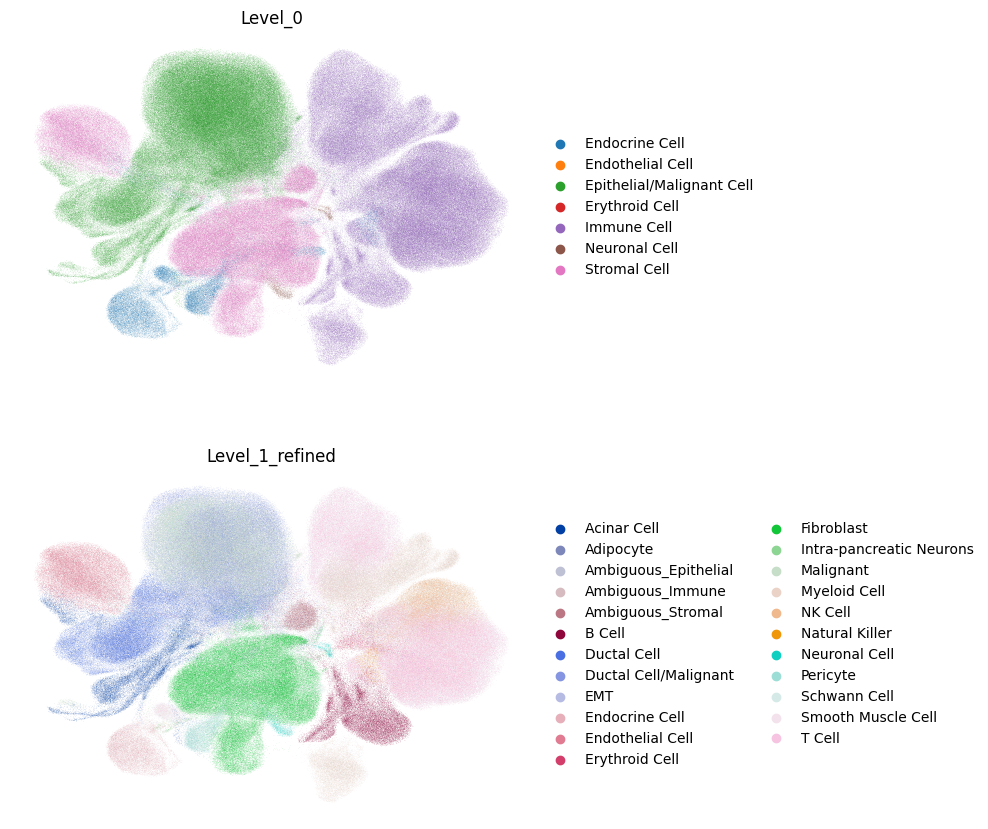

In [54]:
sc.pl.umap(adata, color=['Level_0','Level_1_refined'], frameon=False, ncols=1)

# Mark the manual genes in Manual_Genes Column

In [56]:
valid_genes_sc = [gene for gene in all_genes if gene in adata_sc.var_names]
valid_genes_sn = [gene for gene in all_genes if gene in adata_sn.var_names]
print(f"Total valied genes combined: {len(valid_genes_sc)}")
print(f"Total valied genes combined: {len(valid_genes_sn)}")

Total valied genes combined: 2505
Total valied genes combined: 2505


In [68]:
all_genes = list(set(valid_genes_sc) & set(valid_genes_sn))

In [70]:
len(all_genes)

2505

In [71]:
adata.var['Manual_Genes'] = adata.var.index.isin(all_genes)

In [73]:
adata.var.groupby('Manual_Genes').size()

Manual_Genes
False    36519
True      2505
dtype: int64

# Refine Obs Cols

In [81]:
adata.obs.columns

Index(['Barcode', 'Dataset', 'ID_batch_covariate', 'ID', 'Condition',
       'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation',
       'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5',
       'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant',
       'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status',
       'Level_0', 'Level_1', 'Level_1_refined'],
      dtype='object')

In [96]:
df1 = pd.DataFrame(adata_sc.obs.columns, columns=["Column"])
df2 = pd.DataFrame(adata_sn.obs.columns, columns=["Column"])
df = df1.join(df2, lsuffix="_adata_sc", rsuffix="_adata_sn")

In [101]:
cols_removed = []
for col in adata.obs.columns:
    if adata.obs[col].isna().all():
        print(f"Column '{col}' contains only NaN values.")
        cols_removed.append(col)

In [105]:
adata.obs.head()

,Barcode,Dataset,ID_batch_covariate,ID,Condition,n_genes,n_counts,log_counts,mt_frac,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,leiden,batch,leiden_0.2,leiden_0.2_annotation,leiden_subcluster,level0_leiden_subcluster,leiden_0.5,is_outlier_total_counts,outlier,infercnv_score_malignant,infercnv_score_malignant_refined,cnv_score_abs,treatment_status,Level_0,Level_1,Level_1_refined
Dataset_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0,AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0,Ding,HT056P1_Ding_scRNA-seq,HT056P1,scRNA-seq,2929.0,12375.0,9.423433,0.096727,2929,7.982758,12375.0,9.423514,1197.0,7.088409,9.672727,22,0,2,Epithelial,Unknown,Immune Cell_1,3,False,1,Non-Malignant,Non-Malignant,0.013903,NaN,Immune Cell,T Cell,T Cell
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0,AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0,Ding,HT056P1_Ding_scRNA-seq,HT056P1,scRNA-seq,3440.0,10981.0,9.303922,0.068573,3440,8.143517,10981.0,9.304013,753.0,6.625392,6.857299,8,0,3,Immune,Unknown,Stromal Cell_1,2,False,0,Non-Malignant,Non-Malignant,0.012955,NaN,Stromal Cell,Fibroblast,Fibroblast
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0,AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0,Ding,HT056P1_Ding_scRNA-seq,HT056P1,scRNA-seq,1976.0,5352.0,8.585226,0.113416,1976,7.589336,5352.0,8.585412,607.0,6.410175,11.341555,30,0,0,Stromal,Unknown,Immune Cell_0,0,False,0,Non-Malignant,Non-Malignant,0.006726,NaN,Immune Cell,T Cell,T Cell
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0,AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0,Ding,HT056P1_Ding_scRNA-seq,HT056P1,scRNA-seq,2446.0,7301.0,8.895766,0.151760,2446,7.802618,7301.0,8.895904,1108.0,7.011214,15.176003,13,0,0,Stromal,Unknown,Immune Cell_0,5,False,1,Non-Malignant,Non-Malignant,0.009569,NaN,Immune Cell,T Cell,T Cell
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0,AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0,Ding,HT056P1_Ding_scRNA-seq,HT056P1,scRNA-seq,2675.0,8489.0,9.046527,0.112852,2675,7.892078,8489.0,9.046644,958.0,6.865891,11.285193,13,0,0,Stromal,Unknown,Immune Cell_0,5,False,0,Non-Malignant,Non-Malignant,0.006726,NaN,Immune Cell,T Cell,T Cell


In [106]:
obs_cols_removed= ['total_counts']

In [113]:
adata.var.head()

,n_cells,ensembl_id,start,end,chromosome,gene_name-0,highly_variable-0,means-0,dispersions-0,dispersions_norm-0,highly_variable_nbatches-0,highly_variable_intersection-0,n_cells_by_counts-0,mean_counts-0,log1p_mean_counts-0,pct_dropout_by_counts-0,total_counts-0,log1p_total_counts-0,mito-0,n_cells_by_counts-1,mean_counts-1,log1p_mean_counts-1,pct_dropout_by_counts-1,total_counts-1,log1p_total_counts-1,Manual_Genes
7SK,3158,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK,False,0.038440,0.595971,0.277561,1,False,3158,0.010937,0.010878,99.488301,6750.0,8.817446,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK-1,361,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK-1,False,0.001250,0.249016,-0.072854,0,False,361,0.000629,0.000628,99.941506,388.0,5.963579,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK-2,2295,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK-2,False,0.053363,0.527450,0.478265,2,False,2295,0.008751,0.008713,99.628135,5401.0,8.594525,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK.1,40,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK.1,False,0.003203,0.379188,0.363570,1,False,40,0.000073,0.000073,99.993519,45.0,3.828641,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK.2,193,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK.2,False,0.014683,0.456671,0.482689,1,False,193,0.000384,0.000384,99.968728,237.0,5.472271,False,0,0.0,0.0,100.0,0.0,0.0,False


In [112]:
adata.var.columns

Index(['n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name-0',
       'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0',
       'highly_variable_nbatches-0', 'highly_variable_intersection-0',
       'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0',
       'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0',
       'mito-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1',
       'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1',
       'Manual_Genes'],
      dtype='object')

# Var columns extended by -0 from adata_sc and -1 from adata_sn because the var values are different and caluclated separately for SC and SN

In [116]:
# Rename the suffixes to indicate the dataset explicitly
adata.var.columns = adata.var.columns.str.replace("-0", "_adata_sc", regex=False)
adata.var.columns = adata.var.columns.str.replace("-1", "_adata_sn", regex=False)

In [121]:
adata.var.head()

,n_cells,ensembl_id,start,end,chromosome,gene_name_adata_sc,highly_variable_adata_sc,means_adata_sc,dispersions_adata_sc,dispersions_norm_adata_sc,highly_variable_nbatches_adata_sc,highly_variable_intersection_adata_sc,n_cells_by_counts_adata_sc,mean_counts_adata_sc,log1p_mean_counts_adata_sc,pct_dropout_by_counts_adata_sc,total_counts_adata_sc,log1p_total_counts_adata_sc,mito_adata_sc,n_cells_by_counts_adata_sn,mean_counts_adata_sn,log1p_mean_counts_adata_sn,pct_dropout_by_counts_adata_sn,total_counts_adata_sn,log1p_total_counts_adata_sn,Manual_Genes
7SK,3158,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK,False,0.038440,0.595971,0.277561,1,False,3158,0.010937,0.010878,99.488301,6750.0,8.817446,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK-1,361,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK-1,False,0.001250,0.249016,-0.072854,0,False,361,0.000629,0.000628,99.941506,388.0,5.963579,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK-2,2295,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK-2,False,0.053363,0.527450,0.478265,2,False,2295,0.008751,0.008713,99.628135,5401.0,8.594525,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK.1,40,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK.1,False,0.003203,0.379188,0.363570,1,False,40,0.000073,0.000073,99.993519,45.0,3.828641,False,0,0.0,0.0,100.0,0.0,0.0,False
7SK.2,193,ENSG00000202241.1,30864250.0,30864552.0,chr6,7SK.2,False,0.014683,0.456671,0.482689,1,False,193,0.000384,0.000384,99.968728,237.0,5.472271,False,0,0.0,0.0,100.0,0.0,0.0,False


In [12]:
obsm_removed = ['X_harmony', 'X_pca', 'X_cnv', 'X_cnv_pca', 'X_cnv_umap']
for i in obsm_removed:
    del adata.obsm[i]

In [15]:
adata.obs.drop('n_counts', axis=1, inplace=True)

# Filter empty droplets

In [19]:
adata.obs['MALAT1_lognorm'] = (adata[:, 'MALAT1'].layers['log_norm']).toarray()

Condition: scRNA-seq


/tmp/ipykernel_4176364/3391207882.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(adata[adata.obs.Condition == condition].obs['MALAT1_lognorm'], shade=True, color='blue', label='MALAT1_lognorm')


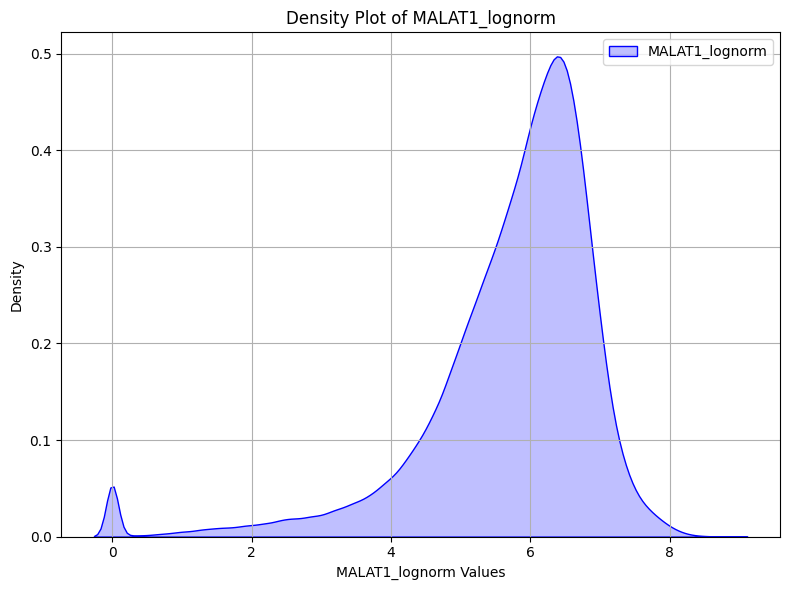

Condition: snRNA-seq


/tmp/ipykernel_4176364/3391207882.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(adata[adata.obs.Condition == condition].obs['MALAT1_lognorm'], shade=True, color='blue', label='MALAT1_lognorm')


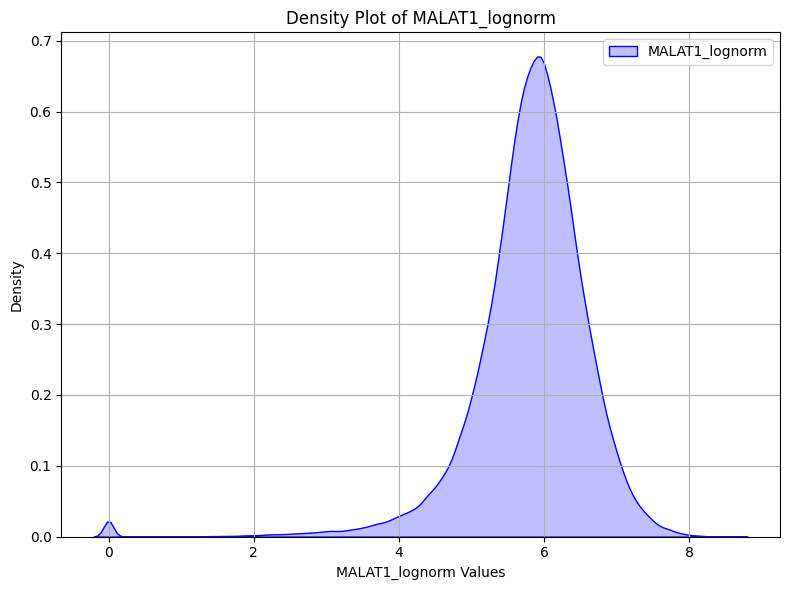

In [4]:
for condition in adata.obs.Condition.unique():
    print(f"Condition: {condition}")
    plt.figure(figsize=(8, 6))
    sb.kdeplot(adata[adata.obs.Condition == condition].obs['MALAT1_lognorm'], shade=True, color='blue', label='MALAT1_lognorm')
    plt.title('Density Plot of MALAT1_lognorm')
    plt.xlabel('MALAT1_lognorm Values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [20]:
adata.obs['empty_droplet'] = np.where(
    (adata.obs['Condition'] == 'scRNA-seq') & (adata.obs['MALAT1_lognorm'] > 3.5), False,
    np.where(
        (adata.obs['Condition'] != 'scRNA-seq') & (adata.obs['MALAT1_lognorm'] >= 4), False, True
    )
)


/tmp/ipykernel_4176364/1868570021.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(adata[adata.obs.n_genes_by_counts <= 2000].obs['n_genes_by_counts'], shade=True, color='blue', label='n_genes_by_counts')


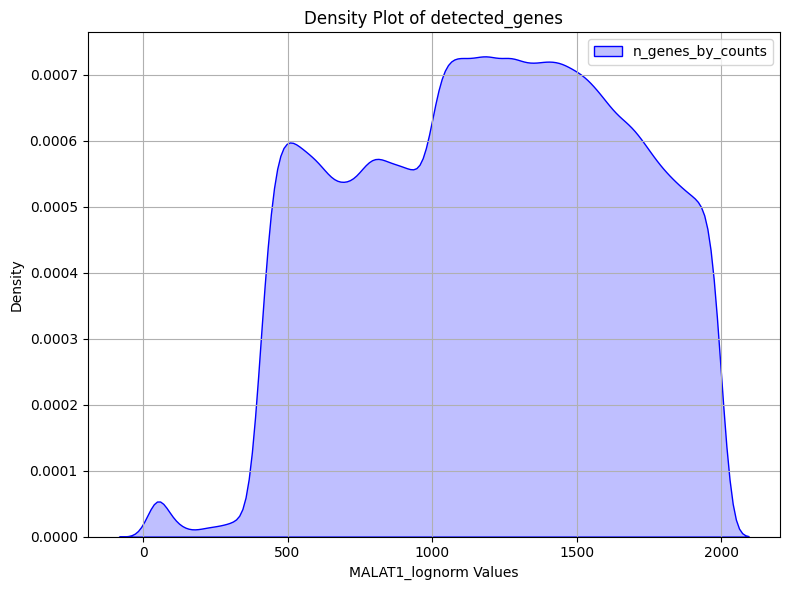

In [12]:
plt.figure(figsize=(8, 6))
sb.kdeplot(adata[adata.obs.n_genes_by_counts <= 2000].obs['n_genes_by_counts'], shade=True, color='blue', label='n_genes_by_counts')
plt.title('Density Plot of detected_genes')
plt.xlabel('MALAT1_lognorm Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
adata = adata[~adata.obs.empty_droplet].copy()

In [24]:
sc.pp.filter_cells(adata, min_genes=400)

# Save the Object

In [27]:
adata.write_h5ad('/mnt/storage/Daniele/atlases/human/adata_all_genes_scpoli_final.h5ad', compression='gzip')

# Check the Saved Object

In [ ]:
adata = sc.read_h5ad('../Finalized/adata_all_genes_scpoli_final.h5ad')

In [ ]:
malignant = adata[adata.obs.Level_1_refined.isin(['Ductal Cell/Malignant', 'Malignant'])]

In [ ]:
sc.pp.neighbors(malignant, n_neighbors=malignant.n_obs//1000, use_rep='X_scpoli', metric='cosine')

In [ ]:
sc.tl.leiden(malignant, resolution=0.25)

In [ ]:
sc.tl.umap(malignant, min_dist=0.75)

In [ ]:
sc.pl.umap(malignant, color='leiden')

In [ ]:
pwd